# Зямзина Анастасия Сергеевна 3530903/70302 #
## 8 вариант ##

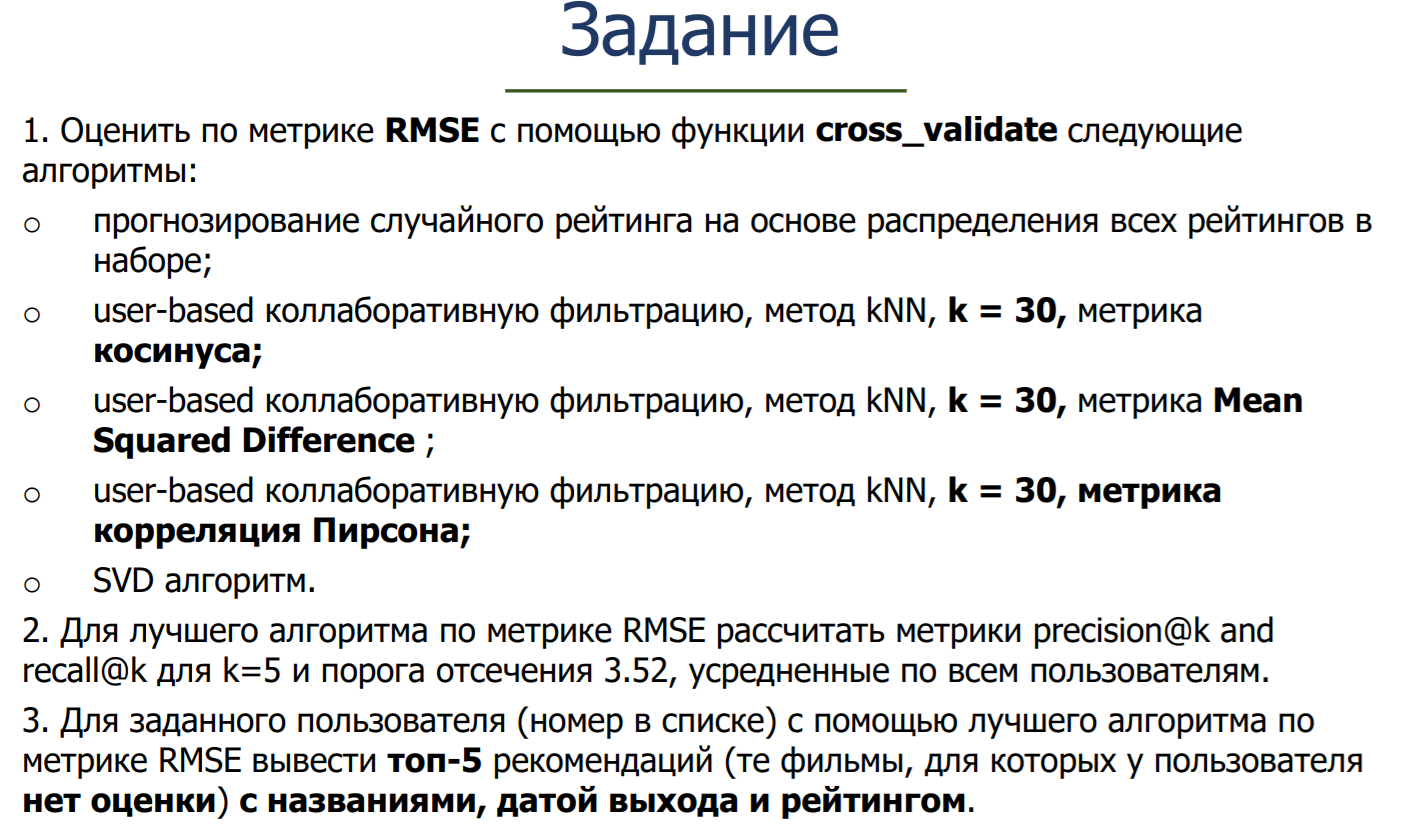

In [199]:
import pandas as pd
import numpy as np
import io 

from collections import defaultdict

### Functions

In [200]:
from surprise import Dataset 
from surprise import accuracy 
from surprise import dump
from surprise.model_selection import cross_validate 
from surprise.model_selection import train_test_split
from surprise.model_selection import PredefinedKFold

### Load data

In [201]:
data = Dataset.load_builtin('ml-100k')
data

In [202]:
trainset, testset = train_test_split(data, test_size=.25)
trainset

### Define algorithms

In [203]:
from surprise import SVD
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNBaseline

Массив для хранения алгоритмов и их оценок

In [204]:
estim = []

## 1 часть ##
**1. Прогнозирование случайного рейтинга на основе распределения всех рейтингов в наборе**

In [205]:
algo1 = NormalPredictor()
algo1.fit(trainset)
predictions1 = algo1.test(testset)
rmse1 = accuracy.rmse(predictions1)
crv1 = cross_validate(algo1, data, measures=['RMSE'], cv=5, verbose=True)
estim.append(round(crv1['test_rmse'].mean(),3))
estim

RMSE: 1.5273
Evaluating RMSE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5195  1.5182  1.5164  1.5203  1.5142  1.5177  0.0022  
Fit time          0.10    0.11    0.12    0.16    0.12    0.12    0.02    
Test time         0.09    0.10    0.12    0.24    0.09    0.13    0.06    


[1.518]

**2. User-based коллаборативную фильтрацию, метод kNN, k = 30, метрика косинуса**

In [206]:
algo2 = KNNBasic(k=30,sim_options={'name': 'cosine'}) #userbased default = true
algo2.fit(trainset)
predictions2 = algo2.test(testset)
rmse2 = accuracy.rmse(predictions2)
crv2 = cross_validate(algo2, data, measures=['RMSE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0182
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0242  1.0257  1.0133  1.0116  1.0217  1.0193  0.0058  
Fit time          1.49    1.52    1.96    1.53    1.53    1.61    0.18    
Test time         2.48    2.66    2.73    2.51    2.62    2.60    0.09    


In [207]:
meanrmse2 = round(crv2['test_rmse'].mean(),3)
estim.append(meanrmse2)
estim

[1.518, 1.019]

**3. User-based коллаборативную фильтрацию, метод kNN, k = 30, метрика Mean Squared Difference**


In [208]:
#The name of the similarity to use, as defined in the similarities module. Default is 'MSD'.
algo3 = KNNBasic(k=30)
algo3.fit(trainset)
predictions3 = algo3.test(testset)
rmse3 = accuracy.rmse(predictions3)
crv3 = cross_validate(algo3, data, measures=['RMSE'], cv=5, verbose=True)
estim.append(round(crv3['test_rmse'].mean(),3))
estim

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9781
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9717  0.9853  0.9782  0.9735  0.9754  0.9768  0.0048  
Fit time          0.65    0.54    0.47    0.48    0.51    0.53    0.06    
Test time         2.76    3.13    2.42    3.26    3.09    2.93    0.30    


[1.518, 1.019, 0.977]

**4. User-based коллаборативную фильтрацию, метод kNN, k = 30, метрика корреляция Пирсона**

In [209]:
sim_options = {'name': 'pearson_baseline',
               'user_based': True,
               'shrinkage': 0  # no shrinkage
               }
algo4 = KNNBasic(k=30, sim_options=sim_options,verbose=False)
#algo4 = KNNBaseline(k=30, sim_options=sim_options)
algo4.fit(trainset)
predictions4 = algo4.test(testset)
rmse4 = accuracy.rmse(predictions4)
crv4 = cross_validate(algo4, data, measures=['RMSE'], cv=5, verbose=True)
estim.append(round(crv4['test_rmse'].mean(),3))
estim

RMSE: 1.0102
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0063  1.0106  1.0079  1.0135  1.0088  1.0094  0.0025  
Fit time          2.14    2.24    2.09    2.39    2.36    2.24    0.12    
Test time         2.68    3.21    3.13    2.91    2.69    2.92    0.22    


[1.518, 1.019, 0.977, 1.009]

**5. SVD алгоритм**

In [210]:
algo5 = SVD()
algo5.fit(trainset)
predictions5 = algo5.test(testset)
rmse5 = accuracy.rmse(predictions4)
crv5 = cross_validate(algo5, data, measures=['RMSE'], cv=5, verbose=True)
estim.append(round(crv5['test_rmse'].mean(),3))
estim
#cross_validate(algo5, data, measures=['RMSE'], cv=5, verbose=True)

RMSE: 1.0102
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9452  0.9341  0.9315  0.9370  0.9387  0.9373  0.0046  
Fit time          4.30    4.22    5.52    6.07    6.10    5.24    0.83    
Test time         0.15    0.12    0.29    0.14    0.15    0.17    0.06    


[1.518, 1.019, 0.977, 1.009, 0.937]

## 2 часть ##
**Для лучшего алгоритма по метрике RMSE рассчитать метрики precision@k and recall@k для k=5 и порога отсечения 3.52, усредненные по всем пользователям.**
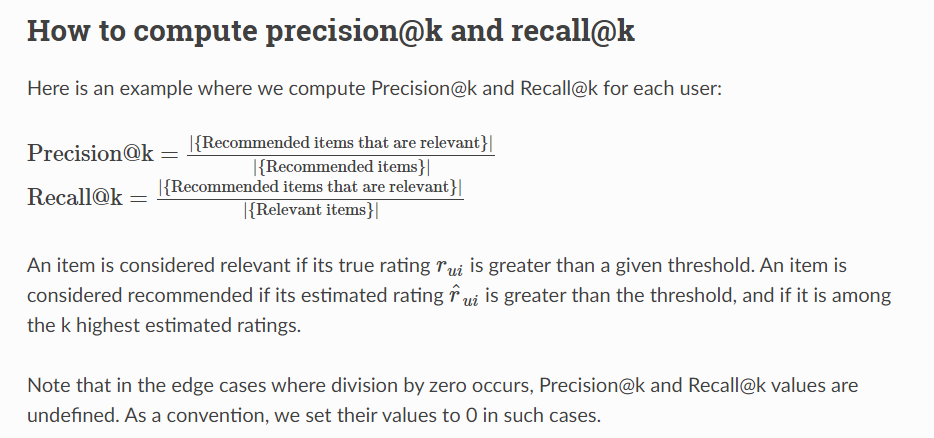

In [211]:
#для начала выясним, какой алгоритм нам нужен
estim = np.array(estim)
ind = np.argpartition(estim, 1)[0:1] # находим минимум среди алгоритмов + индекс минимума
if ind == 0:
    algo = algo1
elif ind ==1:
    algo = algo2
elif ind==2:
    algo = algo3
elif ind ==3:
    algo = algo4
elif ind == 4:
    algo = algo5

print("Лучший алгоритм по метрике rmse:\n", ind,"=",algo,"\nrmse =", estim.min())

Лучший алгоритм по метрике rmse:
 [4] = <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x000001E106005FA0> 
rmse = 0.937


In [212]:
def precision_recall_at_k(predictions, k=5, threshold=3.52):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls

algo.fit(trainset)
predictions = algo.test(testset)
precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=3.52)

    # Precision and recall can then be averaged over all users
print("precision@k:",round(sum(prec for prec in precisions.values()) / len(precisions),3))
print("recall@k:",round(sum(rec for rec in recalls.values()) / len(recalls),3))

precision@k: 0.736
recall@k: 0.373


## 3 часть (8 вариант) ##
**Для заданного пользователя (номер в списке) c помощью лучшего алгоритма по метрике RMSE вывести топ-5 рекомендаций (те фильмы, для которых у пользователя нет оценки) с названиями, датой выхода и рейтингом.**

In [213]:
uid = '8' # raw user id (as in the ratings file). They are **strings**!
iid = '1344'  # raw item id (as in the ratings file). They are **strings**!
